# <div style="text-align: center; background-color:#95a5a6; font-family:Georgia, serif; color: black; padding: 20px;line-height: 1;border-radius:5px; border: 2px solid black;">ABALONE AGE PREDICTION</div>


<div style="text-align:center;">
    <img src="https://d2jx2rerrg6sh3.cloudfront.net/images/news/ImageForNews_759130_16949816863354501.jpg" alt="Butterfly" width="500" height="250">
</div>


# <div style="font-family:Georgia, serif; color: black;">What is Abalone?</div>
The abalone is a type of marine mollusk characterized by its large, ear-shaped shell and a single, spiral-shaped shell. Highly prized for its tender meat, abalone is often considered a delicacy in many cuisines worldwide. Due to overfishing and habitat degradation, abalone populations face significant threats, leading to conservation efforts to protect these valuable marine creatures.
Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope. Number of Rings + 1.5 gives the age of abalone in years.

# <div style="font-family:Georgia, serif; color: black;">Project Objective:</div>
The objective of this project is to create an accurate model for predicting the age of abalone by predicting the number of rings.

# <div style="font-family:Georgia, serif; color: black;"> Data Description</div>
* Sex : M, F, and I (infant)
* Length : Longest shell measurement
* Diameter : perpendicular to length
* Height : with meat in shell
* Whole weight : whole abalone
* Shucked weight : weight of meat
* Viscera weight: gut weight (after bleeding)
* Shell weight : after being dried
* Rings : +1.5 gives the age in years

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [2]:
df = pd.read_csv('/kaggle/input/abalone-dataset-from-uci/abalone1.data.txt')
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight\t,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# <div style="text-align: center; background-color:#95a5a6; font-family:Georgia, serif; color: black; padding: 20px;line-height: 1;border-radius:5px; border: 2px solid black;">EDA</div>

# <div style="font-family:Georgia, serif; color: black;">Shape of the dataset</div>

In [3]:
print('Shape : ',df.shape)

Shape :  (4177, 9)


No.of rows : 4177
    
No.of columns : 9

# <div style="font-family:Georgia, serif; color: black;">Rename columns</div>

In [4]:
df.columns

Index(['Sex', ' Length', ' Diameter', ' Height', ' Whole_weight',
       ' Shucked_weight', ' Viscera_weight', ' Shell_weight\t', ' Rings'],
      dtype='object')

In [5]:
df.rename(columns={' Length': 'Length',' Diameter':'Diameter',' Height':'Height',' Whole_weight':'Whole_weight',' Shucked_weight':'Shucked_weight',' Viscera_weight':'Viscera_weight',' Shell_weight\t':'Shell_weight',' Rings':'Rings'}, inplace=True)


In [6]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# <div style="text-align: center; background-color:#95a5a6; font-family:Georgia, serif; color: black; padding: 20px;line-height: 1;border-radius:5px; border: 2px solid black;">Basic info about our data</div>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
df.describe(include='all')

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


In [10]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

# <div style="font-family:Georgia, serif; color: black;">Checking for missing values</div>

In [11]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [12]:
assert pd.notnull(df).all().all()

There is no missing values or null values in the dataset

In [13]:
print('Unique values of Sex : ',df['Sex'].unique())

Unique values of Sex :  ['M' 'F' 'I']


* #### There are 3 categories : Male , Female , Infant

In [14]:
numerical = [ var for var in df.columns if df[var].dtype !='O']

print(numerical)

df[numerical].head()

['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# <div style="text-align: center; background-color:#95a5a6; font-family:Georgia, serif; color: black; padding: 20px;line-height: 1;border-radius:5px; border: 2px solid black;">Visualization of data</div>

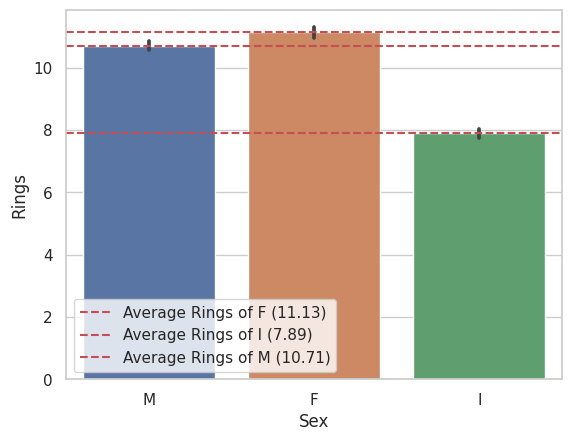

In [15]:
# Calculate the average number of rings for each sex category
avg_rings_per_sex = df.groupby('Sex')['Rings'].mean().reset_index()

# Plot the bar plot
sns.barplot(x='Sex', y='Rings', data=df)

# Plot the average number of rings as a horizontal line
for index, row in avg_rings_per_sex.iterrows():
    plt.axhline(y=row['Rings'], color='r', linestyle='--', label=f'Average Rings of {row["Sex"]} ({row["Rings"]:.2f})')


# Show the plot
plt.legend()
plt.show()


* #### From the figure, we can observe that the average number of rings for female abalones is greater than that for males.

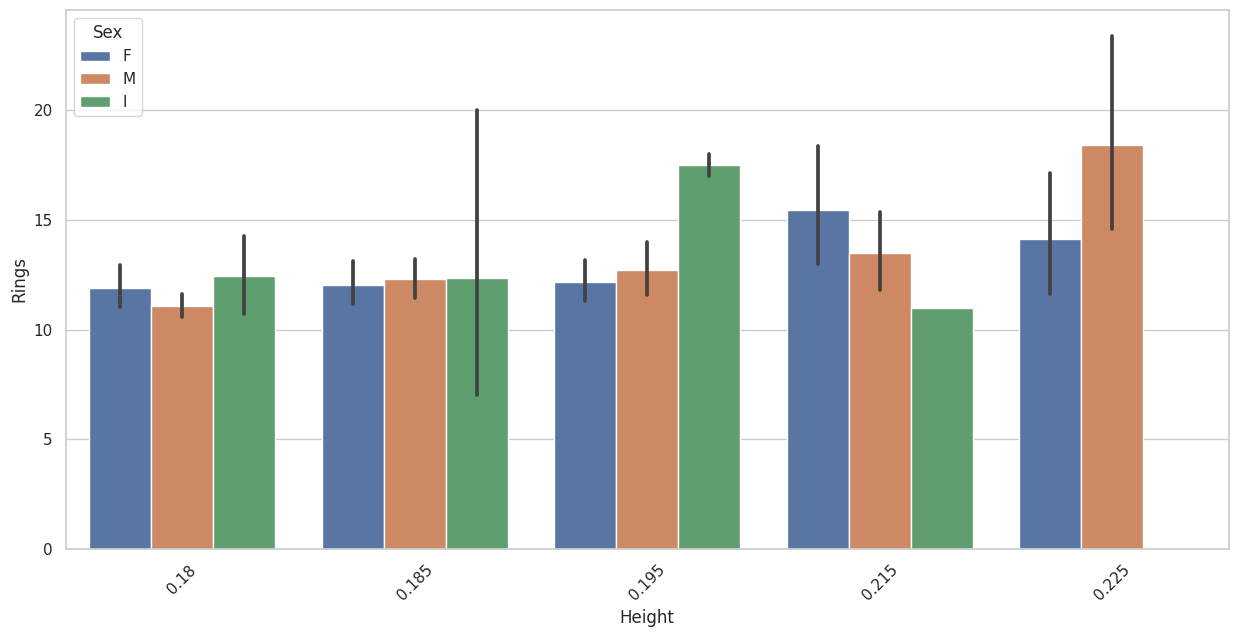

In [16]:
# Calculate the maximum number of rings for each height
max_rings_per_height = df.groupby('Height')['Rings'].max().nlargest(5).index

# Filter the DataFrame to include only the top 5 height with the highest number of rings
df_top_heights = df[df['Height'].isin(max_rings_per_height)]

# Plot the bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x='Height', y='Rings', hue='Sex', data=df_top_heights)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

* #### From the figure, we can observe that female abalones with heights 0.215 and 0.225 have greater number of rings in the case of females.
* #### From the figure, we can observe that male abalones with height 0.215 have greater number of rings in the case of males.
* #### From the figure, we can observe that infant abalones with height 0.195 have greater number of rings in the case of infant.

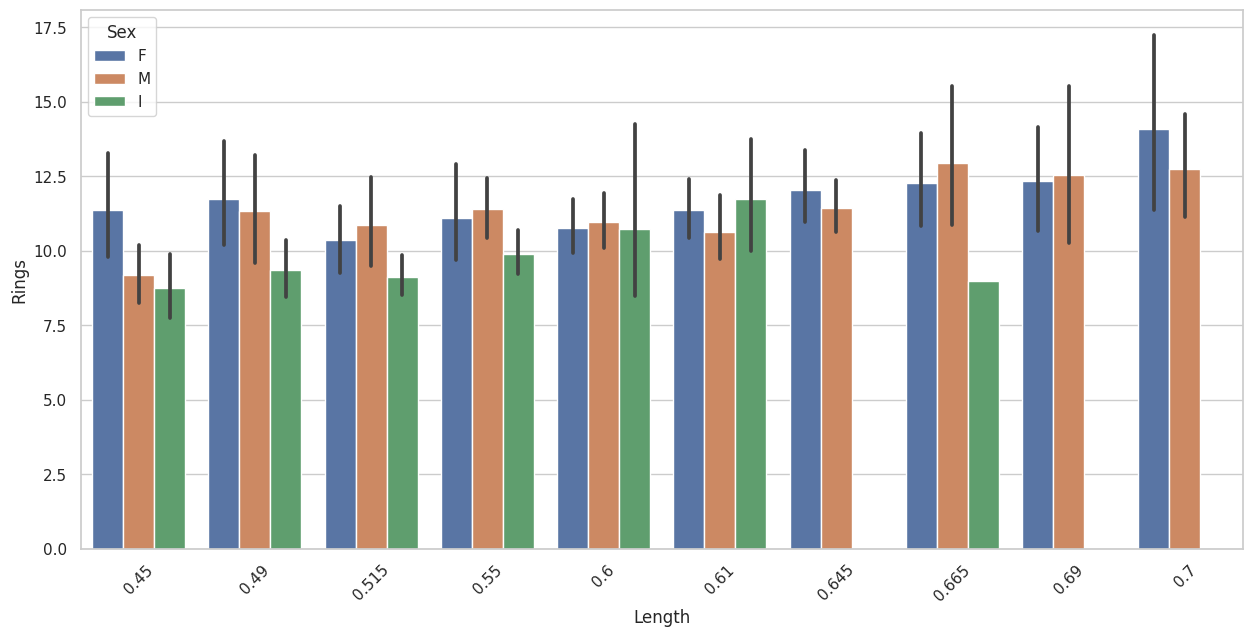

In [17]:
# Calculate the maximum number of rings for each length
max_rings_per_length = df.groupby('Length')['Rings'].max().nlargest(10).index

# Filter the DataFrame to include only the top 10 lengths with the highest number of rings
df_top_lengths = df[df['Length'].isin(max_rings_per_length)]

# Plot the bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x='Length', y='Rings', hue='Sex', data=df_top_lengths)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()


* #### From the figure, we can observe that female abalones with length 0.7 have greater number of rings in the case of females.
* #### From the figure, we can observe that male abalones with length 0.665 have greater number of rings in the case of males.
* #### From the figure, we can observe that infant abalones with length 0.61 have greater number of rings in the case of infant.

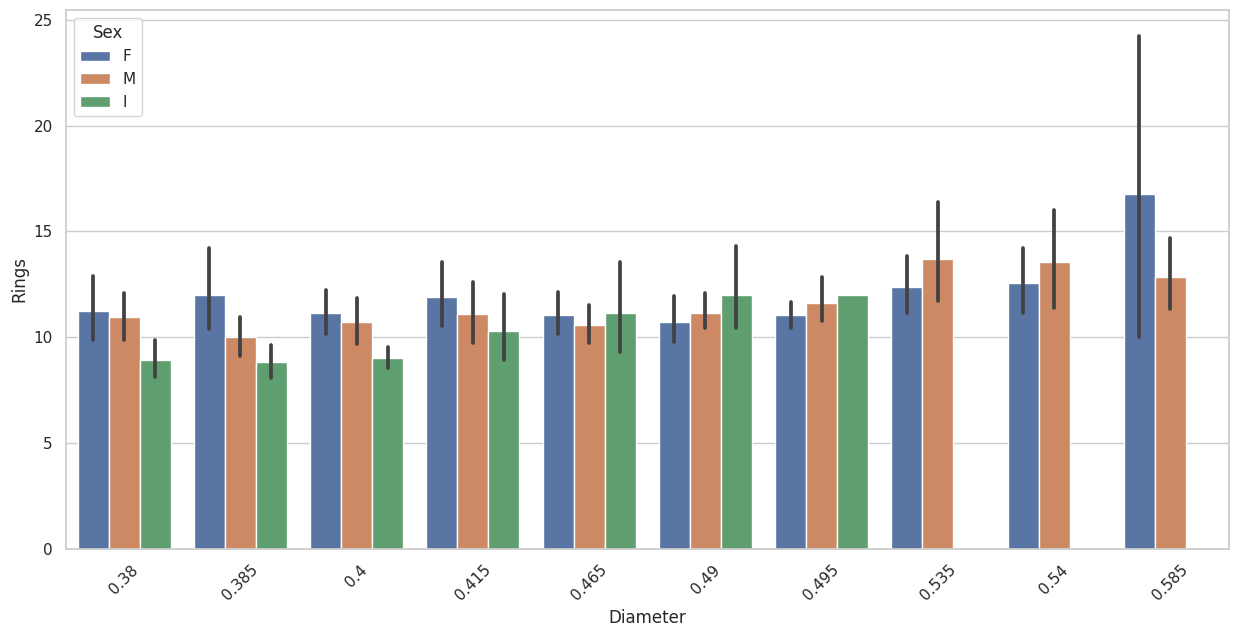

In [18]:
# Calculate the maximum number of rings for each Diameter
max_rings_per_Diameter = df.groupby('Diameter')['Rings'].max().nlargest(10).index

# Filter the DataFrame to include only the top 10 Diameter with the highest number of rings
df_top_Diameters = df[df['Diameter'].isin(max_rings_per_Diameter)]

# Plot the bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x='Diameter', y='Rings', hue='Sex', data=df_top_Diameters)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

* #### From the figure, we can observe that female abalones with diameter 0.585 have greater number of rings in the case of females.
* #### From the figure, we can observe that male abalones with diameter 0.535 have greater number of rings in the case of males.
* #### From the figure, we can observe that infant abalones with diameters 0.49 and 0.495 have greater number of rings in the case of infant.

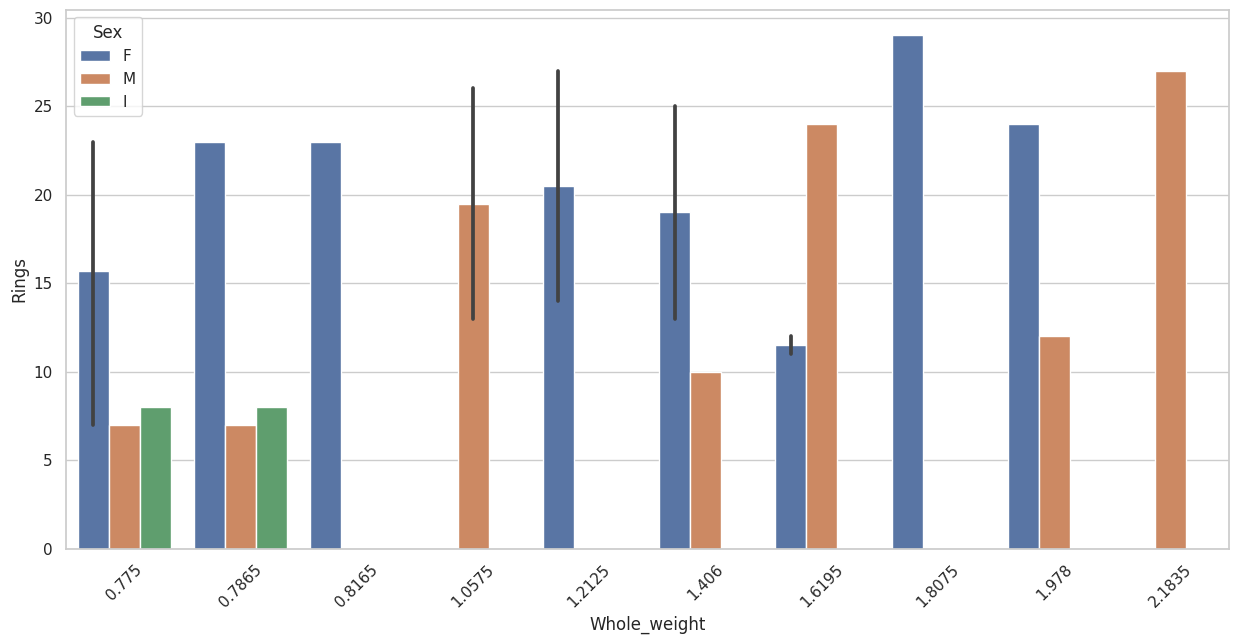

In [19]:
# Calculate the maximum number of rings for each Whole_weight
max_rings_per_Whole_weight = df.groupby('Whole_weight')['Rings'].max().nlargest(10).index

# Filter the DataFrame to include only the top 10 Whole_weight with the highest number of rings
df_top_Whole_weights = df[df['Whole_weight'].isin(max_rings_per_Whole_weight)]

# Plot the bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x='Whole_weight', y='Rings', hue='Sex', data=df_top_Whole_weights)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

* #### From the figure, we can observe that female abalones with whole_weight 1.8075 have greater number of rings in the case of females.
* #### From the figure, we can observe that male abalones with whole_weight 2.1835 have greater number of rings in the case of males.

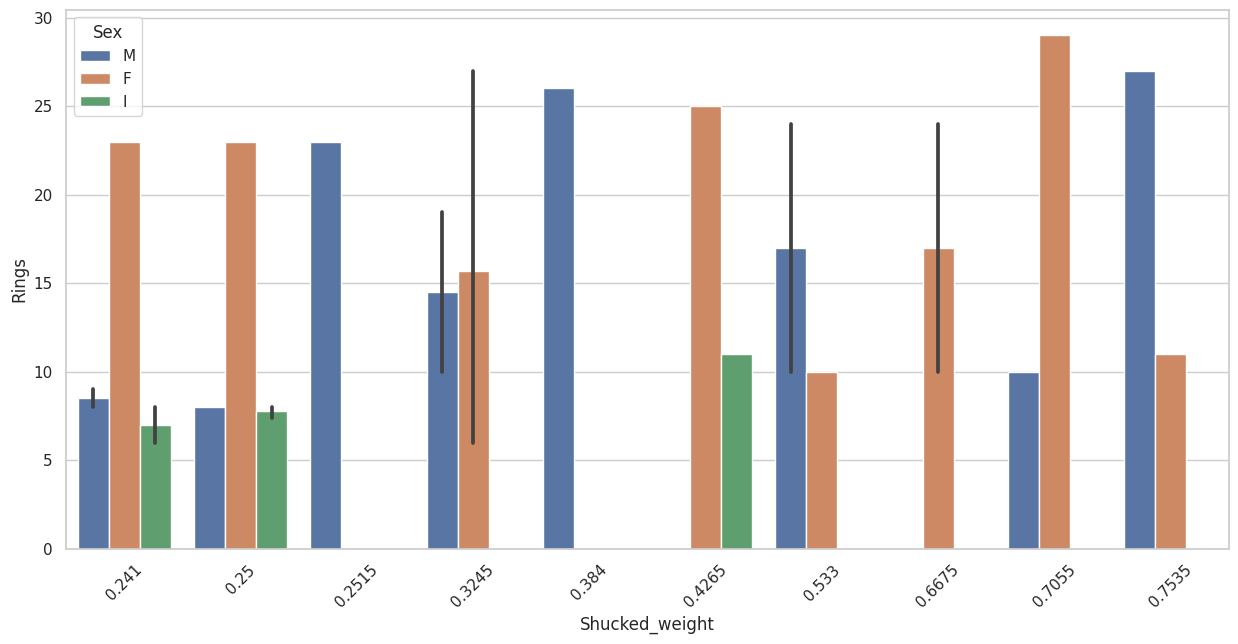

In [20]:
# Calculate the maximum number of rings for each Shucked_weight
max_rings_per_Shucked_weight = df.groupby('Shucked_weight')['Rings'].max().nlargest(10).index

# Filter the DataFrame to include only the top 10 Shucked_weight with the highest number of rings
df_top_Shucked_weights = df[df['Shucked_weight'].isin(max_rings_per_Shucked_weight)]

# Plot the bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x='Shucked_weight', y='Rings', hue='Sex', data=df_top_Shucked_weights)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

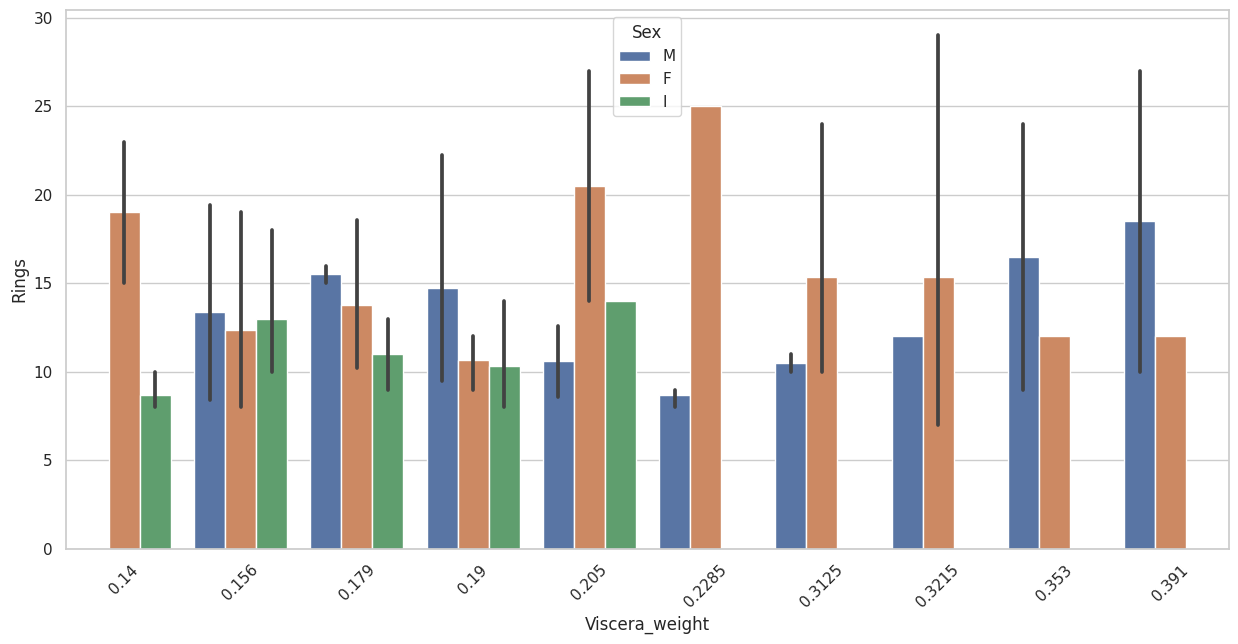

In [21]:
# Calculate the maximum number of rings for each Viscera_weight
max_rings_per_Viscera_weight = df.groupby('Viscera_weight')['Rings'].max().nlargest(10).index

# Filter the DataFrame to include only the top 10 Viscera_weight with the highest number of rings
df_top_Viscera_weights = df[df['Viscera_weight'].isin(max_rings_per_Viscera_weight)]

# Plot the bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x='Viscera_weight', y='Rings', hue='Sex', data=df_top_Viscera_weights)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

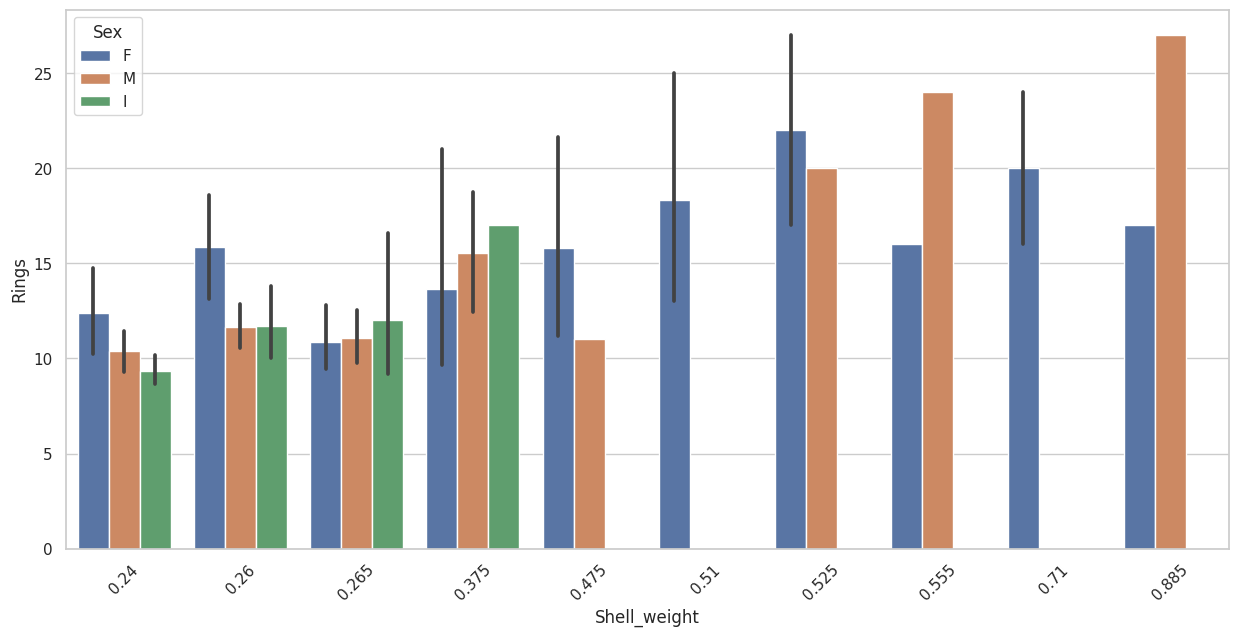

In [22]:
# Calculate the maximum number of rings for each Shell_weight
max_rings_per_Shell_weight = df.groupby('Shell_weight')['Rings'].max().nlargest(10).index

# Filter the DataFrame to include only the top 10 Viscera_weight with the highest number of rings
df_top_Shell_weights = df[df['Shell_weight'].isin(max_rings_per_Shell_weight)]

# Plot the bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x='Shell_weight', y='Rings', hue='Sex', data=df_top_Shell_weights)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

<Axes: xlabel='Rings', ylabel='Shell_weight'>

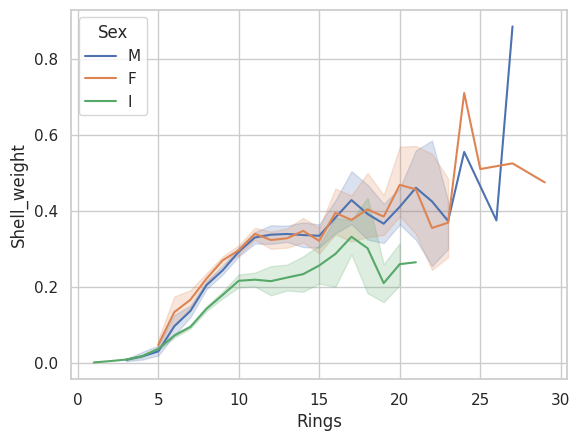

In [23]:
sns.lineplot(data=df,x='Rings',y='Shell_weight',hue='Sex')

* #### In the case of females, the number of rings increases as the shell weight increases.

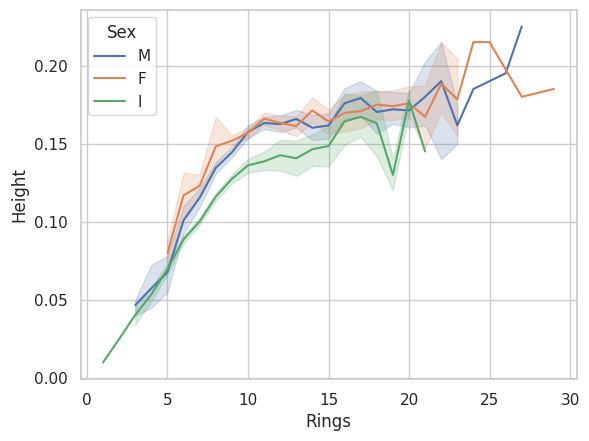

In [24]:
sns.lineplot(data=df,x='Rings',y='Height',hue='Sex')
plt.show()

* #### In the case of females, the number of rings increases as the height increases.
* #### In the case of males, the number of rings increases as the height increases.

<Axes: xlabel='Rings', ylabel='Length'>

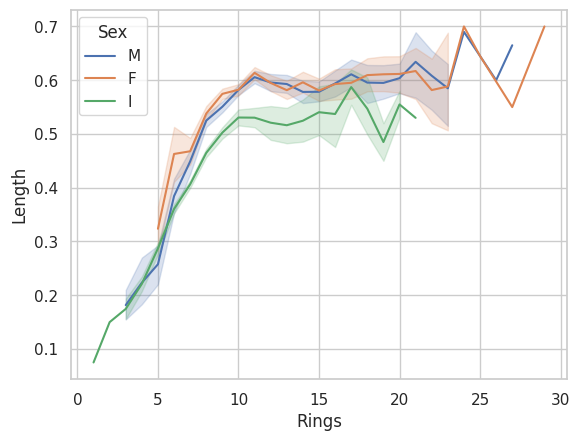

In [25]:
sns.lineplot(data=df,x='Rings',y='Length',hue='Sex')

* #### Number of rings increases as the length increases for all abalones **

<Axes: xlabel='Rings', ylabel='Diameter'>

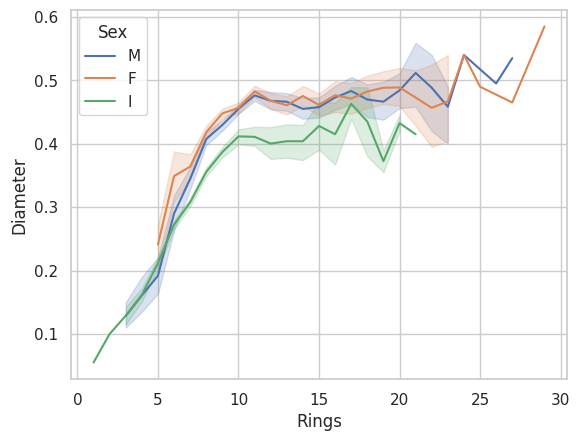

In [26]:
sns.lineplot(data=df,x='Rings',y='Diameter',hue='Sex')

<Axes: xlabel='Rings', ylabel='Sex'>

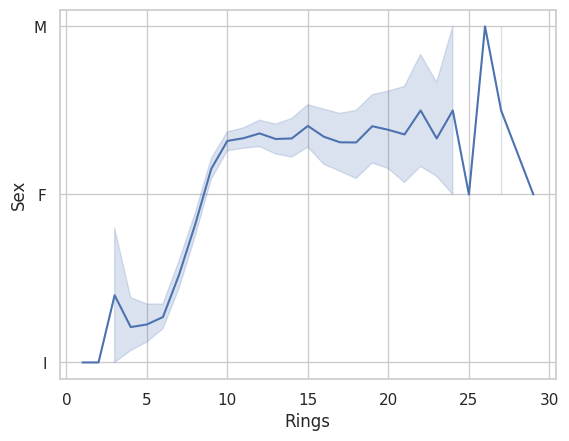

In [27]:
sns.lineplot(data=df,x='Rings',y='Sex')

In [28]:
df=pd.get_dummies(df,columns=['Sex'])
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,True,False,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,False,False,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,False,False,True
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,True,False,False


# <div style="text-align: center; background-color:#95a5a6; font-family:Georgia, serif; color: black; padding: 20px;line-height: 1;border-radius:5px; border: 2px solid black;">Train Test Split</div>

In [29]:
x = df.drop('Rings',axis=1)
y = df['Rings']

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=0)

In [31]:
x_train

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
1376,0.620,0.510,0.175,1.2815,0.5715,0.2385,0.3900,False,False,True
1225,0.345,0.255,0.085,0.2005,0.1050,0.0370,0.0500,False,True,False
2722,0.375,0.275,0.095,0.2295,0.0950,0.0545,0.0660,False,True,False
3387,0.545,0.410,0.145,0.8730,0.3035,0.1960,0.3100,False,False,True
2773,0.580,0.465,0.145,0.9865,0.4700,0.2155,0.2500,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1033,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770,False,False,True
3264,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850,True,False,False
1653,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535,False,False,True
2607,0.625,0.490,0.165,1.1270,0.4770,0.2365,0.3185,True,False,False


In [32]:
# Feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# <div style="text-align: center; background-color:#95a5a6; font-family:Georgia, serif; color: black; padding: 20px;line-height: 1;border-radius:5px; border: 2px solid black;">Model building</div>

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rfr=RandomForestRegressor(n_estimators=300)
rfr.fit(x_train,y_train)
y_predict=rfr.predict(x_test)

In [35]:
##cheking accuracy
from sklearn.metrics import mean_squared_error

print('Model of RF with 300 estimators:', mean_squared_error(y_test,y_predict))

Model of RF with 300 estimators: 4.83597112351586


In [36]:
##feature importance

rgr = RandomForestRegressor()

rgr.fit(x_train,y_train)

RandomForestRegressor()

In [37]:
rgr.feature_importances_

array([0.04696995, 0.04920837, 0.05005032, 0.07871749, 0.17111765,
       0.06766489, 0.50581377, 0.00649305, 0.01857403, 0.00539049])

In [38]:
feature_importances = pd.Series(rgr.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_importances

Shell_weight      0.505814
Shucked_weight    0.171118
Whole_weight      0.078717
Viscera_weight    0.067665
Height            0.050050
Diameter          0.049208
Length            0.046970
Sex_I             0.018574
Sex_F             0.006493
Sex_M             0.005390
dtype: float64

In [39]:
##selected features are using to build random forest classifier
x_train = x_train.drop('Sex_M',axis=1)
x_test = x_test.drop('Sex_M',axis=1)

In [40]:
x_train

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I
1376,0.620,0.510,0.175,1.2815,0.5715,0.2385,0.3900,False,False
1225,0.345,0.255,0.085,0.2005,0.1050,0.0370,0.0500,False,True
2722,0.375,0.275,0.095,0.2295,0.0950,0.0545,0.0660,False,True
3387,0.545,0.410,0.145,0.8730,0.3035,0.1960,0.3100,False,False
2773,0.580,0.465,0.145,0.9865,0.4700,0.2155,0.2500,True,False
...,...,...,...,...,...,...,...,...,...
1033,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770,False,False
3264,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850,True,False
1653,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535,False,False
2607,0.625,0.490,0.165,1.1270,0.4770,0.2365,0.3185,True,False


In [41]:
x_test

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I
668,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350,False,False
1580,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935,False,True
3784,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175,False,False
463,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200,False,True
2615,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775,False,False
...,...,...,...,...,...,...,...,...,...
1052,0.765,0.600,0.220,2.3020,1.0070,0.5090,0.6205,False,False
3439,0.440,0.350,0.125,0.4560,0.2100,0.0955,0.1310,False,True
1174,0.635,0.495,0.015,1.1565,0.5115,0.3080,0.2885,True,False
2210,0.660,0.505,0.200,1.6305,0.4865,0.2970,0.6100,False,False


In [42]:
rfr1=RandomForestRegressor(n_estimators=300)
rfr1.fit(x_train,y_train)
y_predict=rfr1.predict(x_test)

In [43]:
print('Model of RF with 300 estimators:', mean_squared_error(y_test,y_predict))

Model of RF with 300 estimators: 4.82391050859472


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 5, 10],
}

# Instantiate RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300, criterion='squared_error')

# Instantiate GridSearchCV
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit GridSearchCV to data
grid_search.fit(x_train, y_train)

# Print the best parameters found
print(grid_search.best_params_)

{'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 300}


In [45]:
# fit the model
rf.fit(x_train,y_train)

# prediction
y_predict=rf.predict(x_test)

In [46]:
print('Model of RF with 300 estimators:', mean_squared_error(y_test,y_predict))

Model of RF with 300 estimators: 4.832509356725146


# <div style="text-align: center; background-color:#95a5a6; font-family:Georgia, serif; color: black; padding: 20px;line-height: 1;border-radius:5px; border: 2px solid black;">Adding an extra column named Age </div>

Now we can predict the age of Abalone by adding 1.5 to number of rings.

In [47]:
 x_train['Age']=y_train+1.5

In [48]:
x_train

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Age
1376,0.620,0.510,0.175,1.2815,0.5715,0.2385,0.3900,False,False,11.5
1225,0.345,0.255,0.085,0.2005,0.1050,0.0370,0.0500,False,True,6.5
2722,0.375,0.275,0.095,0.2295,0.0950,0.0545,0.0660,False,True,8.5
3387,0.545,0.410,0.145,0.8730,0.3035,0.1960,0.3100,False,False,19.5
2773,0.580,0.465,0.145,0.9865,0.4700,0.2155,0.2500,True,False,12.5
...,...,...,...,...,...,...,...,...,...,...
1033,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770,False,False,11.5
3264,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850,True,False,13.5
1653,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535,False,False,11.5
2607,0.625,0.490,0.165,1.1270,0.4770,0.2365,0.3185,True,False,10.5


In [49]:
x_test['Age']=y_test+1.5

In [50]:
x_test

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Age
668,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350,False,False,14.5
1580,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935,False,True,9.5
3784,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175,False,False,12.5
463,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200,False,True,6.5
2615,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775,False,False,13.5
...,...,...,...,...,...,...,...,...,...,...
1052,0.765,0.600,0.220,2.3020,1.0070,0.5090,0.6205,False,False,13.5
3439,0.440,0.350,0.125,0.4560,0.2100,0.0955,0.1310,False,True,9.5
1174,0.635,0.495,0.015,1.1565,0.5115,0.3080,0.2885,True,False,10.5
2210,0.660,0.505,0.200,1.6305,0.4865,0.2970,0.6100,False,False,19.5
